# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset=pd.read_csv('E:\\Courses\\Machine learning arabic nanodegree\\Part 2 - Regression\\Section 5 - Multiple Linear Regression\\50_Startups.csv')

# Dataset Info

Dataset Heading

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Dataset Satistics_Info

In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
dataset.median()

R&D Spend           73051.080
Administration     122699.795
Marketing Spend    212716.240
Profit             107978.190
dtype: float64

In [6]:
print("Skewness: %f" % dataset['Profit'].skew()) 
print("Kurtosis: %f" % dataset['Profit'].kurt())

Skewness: 0.023291
Kurtosis: -0.063859


# Graphs

 Relationship with numerical variables

C:\Users\asrar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


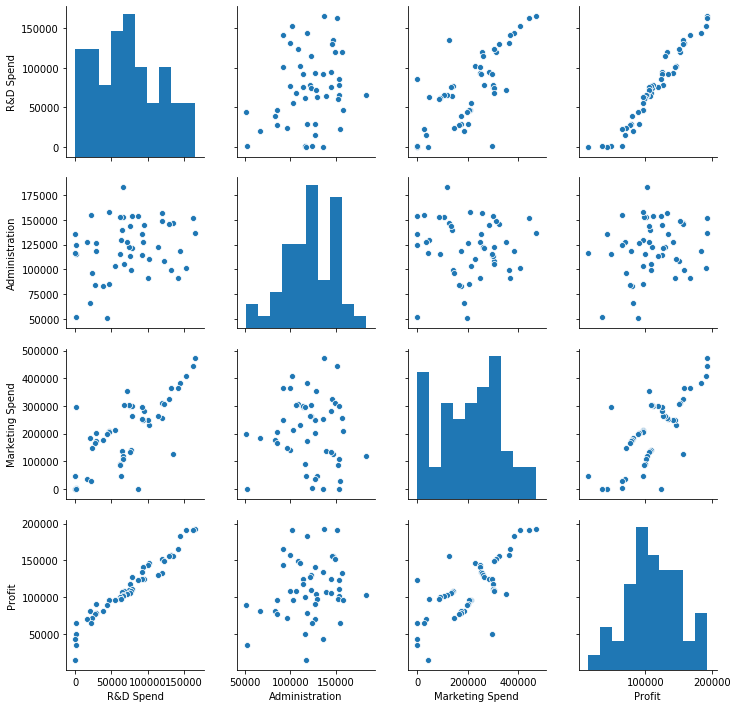

In [7]:
sns.pairplot(dataset,size=2.5)

C:\Users\asrar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


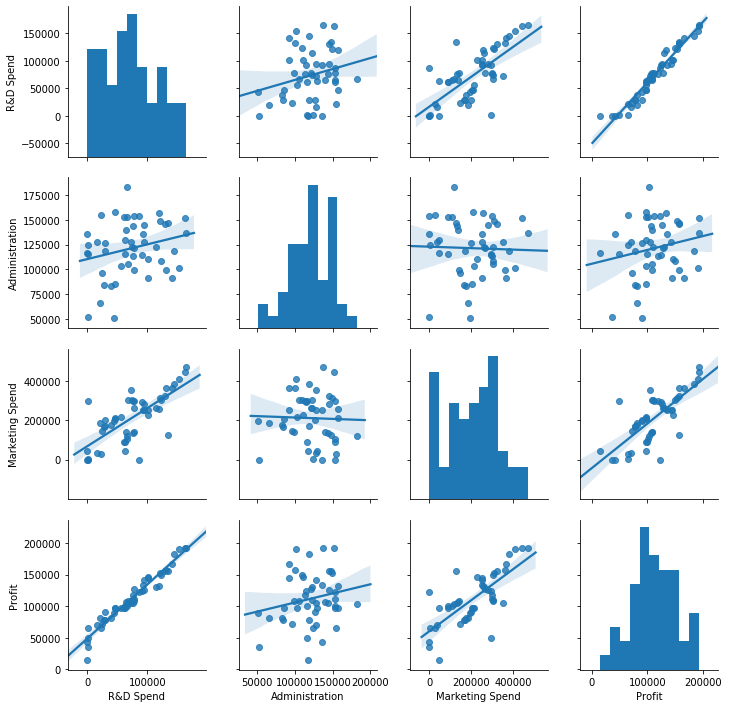

In [71]:
sns.pairplot(dataset,size=2.5,kind='reg')

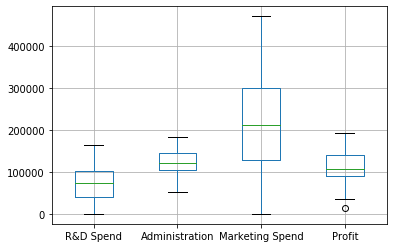

In [8]:
dataset.boxplot()

In [9]:
 def Identify_Outliers(Var):
    q1, q3= np.percentile(dataset[Var],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    outliers = [x for x in dataset[Var] if x < lower_bound or x > upper_bound]
    print('Identified outliers: %d' % len(outliers))
    print(outliers)
    
Identify_Outliers('Profit')

Identified outliers: 1
[14681.4]


Relationship with categorical features

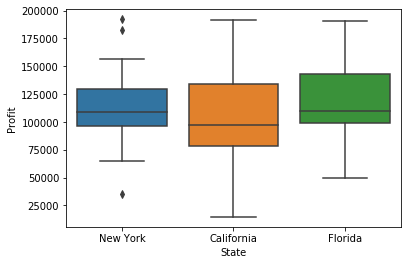

In [10]:
sns.boxplot(x=dataset['State'],y=dataset['Profit'])

In [11]:
Sub_dataset=dataset[dataset['State'] == "New York"]

def Identify_Outliers(Var):
    q1, q3= np.percentile(Var,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    outliers = [x for x in Var if x < lower_bound or x > upper_bound]
    print('Identified outliers: %d' % len(outliers))
    print(outliers)
    
Identify_Outliers(Sub_dataset['Profit'])

Identified outliers: 3
[192261.83, 182901.99, 35673.41]


Correlation Matrix

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


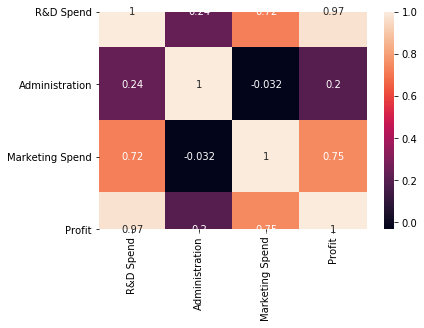

In [12]:
print(dataset.corr())
sns.heatmap(dataset.corr(),annot=True)

# Comments

1- positive skewness : Profit of many Companies was being less than the average value

2- negative Kurtosis : level of risk is low

3- from Grahps : 
                - the relation between R&D Spend and Profit is linear 
                - the relation between Marketing Spend and Profit is linear 
                - Profit has one outliar values 14681.4
                - Profit of New York has three outliars 192261.83, 182901.99, 35673.41
                
4- From Correlation Matrix :
                - there is a strong relation between (R&D Spend, Marketing Spend )and Profit

# Data Preprocessing

Handling Missing Data

In [13]:
def Missing_data():
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)
    
Missing_data()

                 Total  Percent
Profit               0      0.0
State                0      0.0
Marketing Spend      0      0.0
Administration       0      0.0
R&D Spend            0      0.0


splitting dataset into independent variables and dependent variables

In [14]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,4].values

Handling Categorical Data

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#for categorical data in Independent Variable (multiple classes) so., use lable encoding then onehotencoder

# Encoding the Independent Variable into number labels
labelEncoder = LabelEncoder()
X[:, 3] = labelEncoder.fit_transform(X[:, 3])

# Encoding the Independent Variable into dummy variables
onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()

# avoiding Dummuy variables traps
X = X[ : , 1:]

C:\Users\asrar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\asrar\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# Model 

Based on my data exploration , I choose Linear Regression to build the model

chossing backward Elimination method to know the best Independent variables that affect on dependent variable
and we judge on Independent variables 

by P-value, significant level = 5%

In [20]:
import statsmodels.api as sm

# adding constant to fit equation of Multiple Linear Regression Y= b0 +b1X1 + ..............
X = sm.add_constant(X)

# backwardElimination
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x
 
SL = 0.05
X_Modeled = backwardElimination(X, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           3.50e-32
Time:                        10:16:44   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

In [64]:
X_New = X_Modeled[:,1:2]

Splitting the dataset into the Training set and Test set

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_New,Y,test_size=0.3,random_state=0)

Deploy Model

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Model Results

In [68]:
Y_pred_test = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)

Visualising

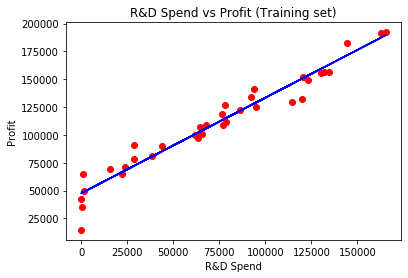

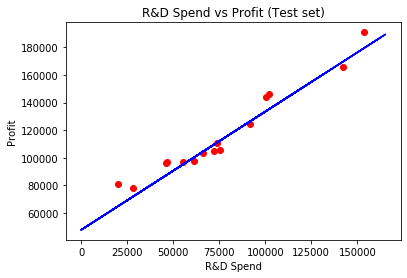

In [70]:
# Visualising the Training set results
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, Y_pred_train, color='blue')
plt.title('R&D Spend vs Profit (Training set)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

# Visualising the Training set results
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_train, Y_pred_train, color='blue')
plt.title('R&D Spend vs Profit (Test set)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

In [79]:
regressor.predict([[50000]])

array([90571.59739088])